<a href="https://colab.research.google.com/github/pooja140703/-Map/blob/main/ML_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cow-pose.jpg to Cow-pose.jpg


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Cat-Web-Pose-Channel.jpg to Cat-Web-Pose-Channel.jpg


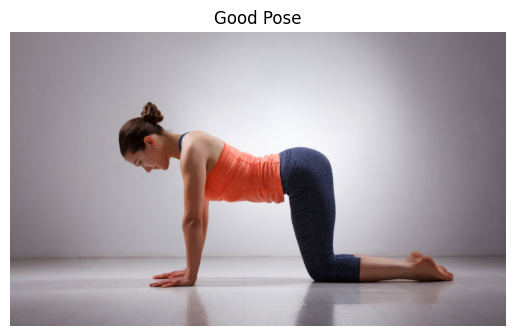

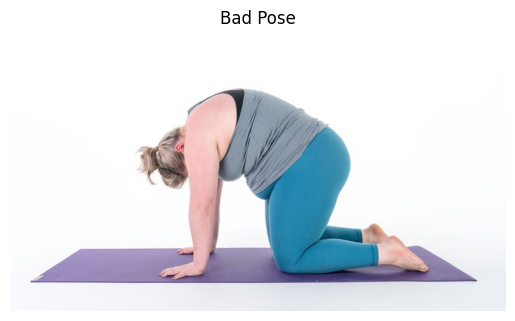

In [5]:
import cv2
from matplotlib import pyplot as plt

# Read the images
good_pose = cv2.imread('Cow-pose.jpg')
bad_pose = cv2.imread('Cat-Web-Pose-Channel.jpg')

# Check if images are loaded correctly
if good_pose is None or bad_pose is None:
    print("Error: One of the images did not load correctly.")
else:
    # Convert BGR to RGB for displaying with matplotlib
    good_pose_rgb = cv2.cvtColor(good_pose, cv2.COLOR_BGR2RGB)
    bad_pose_rgb = cv2.cvtColor(bad_pose, cv2.COLOR_BGR2RGB)

    # Display images
    plt.imshow(good_pose_rgb)
    plt.title("Good Pose")
    plt.axis('off')  # Optional: Turn off axis labels
    plt.show()

    plt.imshow(bad_pose_rgb)
    plt.title("Bad Pose")
    plt.axis('off')  # Optional: Turn off axis labels
    plt.show()

In [7]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


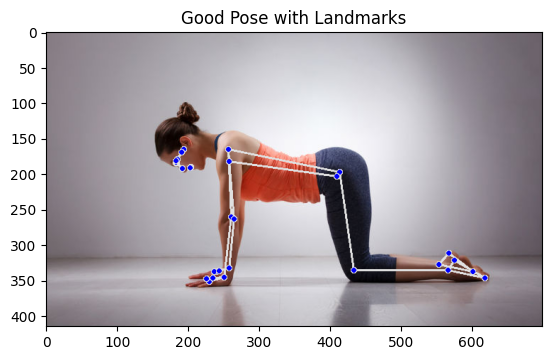

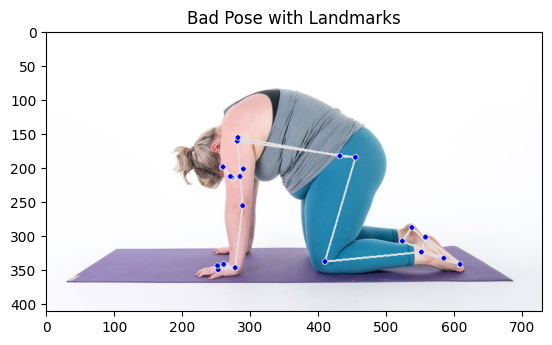

In [8]:
import mediapipe as mp

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Process the good pose image
result_good = pose.process(good_pose_rgb)
result_bad = pose.process(bad_pose_rgb)

# Draw landmarks on the good pose image
if result_good.pose_landmarks:
    mp_drawing.draw_landmarks(good_pose_rgb, result_good.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Draw landmarks on the bad pose image
if result_bad.pose_landmarks:
    mp_drawing.draw_landmarks(bad_pose_rgb, result_bad.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Display the results
plt.imshow(good_pose_rgb)
plt.title("Good Pose with Landmarks")
plt.show()

plt.imshow(bad_pose_rgb)
plt.title("Bad Pose with Landmarks")
plt.show()

In [9]:
def extract_keypoints(results):
    keypoints = []
    for landmark in results.pose_landmarks.landmark:
        keypoints.append([landmark.x, landmark.y, landmark.z])
    return keypoints

good_pose_keypoints = extract_keypoints(result_good)
bad_pose_keypoints = extract_keypoints(result_bad)

print("Good Pose Keypoints:", good_pose_keypoints)
print("Bad Pose Keypoints:", bad_pose_keypoints)

Good Pose Keypoints: [[0.27437615394592285, 0.4666256308555603, 0.006861586589366198], [0.2636606693267822, 0.4447900950908661, -0.02390715666115284], [0.2642098069190979, 0.4402398467063904, -0.023901699110865593], [0.26489466428756714, 0.43490469455718994, -0.02389366179704666], [0.2624048888683319, 0.44672948122024536, 0.02189534157514572], [0.2620742619037628, 0.44386905431747437, 0.021897519007325172], [0.2619294822216034, 0.4406498074531555, 0.02195420302450657], [0.27718138694763184, 0.4004448354244232, -0.08447429537773132], [0.2741238474845886, 0.40998703241348267, 0.11603060364723206], [0.2918759882450104, 0.46154913306236267, -0.013008547015488148], [0.29082509875297546, 0.4644753634929657, 0.04586031287908554], [0.3678944706916809, 0.4011116623878479, -0.204051211476326], [0.3691377341747284, 0.4413481056690216, 0.26492419838905334], [0.3732025623321533, 0.6291671395301819, -0.27568763494491577], [0.37895816564559937, 0.6376624703407288, 0.31424203515052795], [0.35927045345

In [10]:
def extract_face_keypoints(results):
    face_keypoints = []
    face_landmark_indices = range(11)  # Indices 0 to 10 are related to the face
    for i in face_landmark_indices:
        landmark = results.pose_landmarks.landmark[i]
        face_keypoints.append([landmark.x, landmark.y, landmark.z])
    return face_keypoints

# Assuming 'cow pose' refers to the good pose or bad pose
# Choose one to extract face keypoints

# For good pose:
cow_pose_face_keypoints = extract_face_keypoints(result_good)

# OR for bad pose:
# cow_pose_face_keypoints = extract_face_keypoints(result_bad)

# Print the face keypoints
print("Cow Pose Face Keypoints:", cow_pose_face_keypoints)

Cow Pose Face Keypoints: [[0.27437615394592285, 0.4666256308555603, 0.006861586589366198], [0.2636606693267822, 0.4447900950908661, -0.02390715666115284], [0.2642098069190979, 0.4402398467063904, -0.023901699110865593], [0.26489466428756714, 0.43490469455718994, -0.02389366179704666], [0.2624048888683319, 0.44672948122024536, 0.02189534157514572], [0.2620742619037628, 0.44386905431747437, 0.021897519007325172], [0.2619294822216034, 0.4406498074531555, 0.02195420302450657], [0.27718138694763184, 0.4004448354244232, -0.08447429537773132], [0.2741238474845886, 0.40998703241348267, 0.11603060364723206], [0.2918759882450104, 0.46154913306236267, -0.013008547015488148], [0.29082509875297546, 0.4644753634929657, 0.04586031287908554]]


In [11]:
def extract_eye_keypoints(results):
    eye_keypoints = []
    eye_landmark_indices = [1, 2, 3, 4, 5, 6]  # Indices related to the eyes
    for i in eye_landmark_indices:
        landmark = results.pose_landmarks.landmark[i]
        eye_keypoints.append([landmark.x, landmark.y, landmark.z])
    return eye_keypoints

# Assuming 'cow pose' refers to the good pose or bad pose
# Choose one to extract eye keypoints

# For good pose:
cow_pose_eye_keypoints = extract_eye_keypoints(result_good)

# OR for bad pose:
# cow_pose_eye_keypoints = extract_eye_keypoints(result_bad)

# Print the eye keypoints
print("Cow Pose Eye Keypoints:", cow_pose_eye_keypoints)


Cow Pose Eye Keypoints: [[0.2636606693267822, 0.4447900950908661, -0.02390715666115284], [0.2642098069190979, 0.4402398467063904, -0.023901699110865593], [0.26489466428756714, 0.43490469455718994, -0.02389366179704666], [0.2624048888683319, 0.44672948122024536, 0.02189534157514572], [0.2620742619037628, 0.44386905431747437, 0.021897519007325172], [0.2619294822216034, 0.4406498074531555, 0.02195420302450657]]


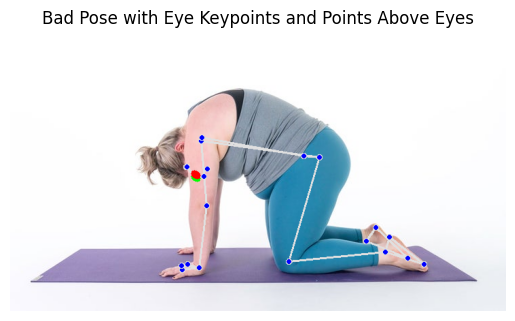

In [12]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp

# Function to extract eye keypoints
def extract_eye_keypoints(results):
    eye_keypoints = []
    eye_landmark_indices = [1, 2, 3, 4, 5, 6]  # Indices related to the eyes
    for i in eye_landmark_indices:
        landmark = results.pose_landmarks.landmark[i]
        eye_keypoints.append([landmark.x, landmark.y, landmark.z])
    return eye_keypoints

# Function to get points slightly above the eyes
def get_points_above_eyes(eye_keypoints, offset=0.01):
    points_above_eyes = []
    for eye in eye_keypoints:
        x, y, z = eye
        points_above_eyes.append([x, y - offset, z])  # Moving the point upwards
    return points_above_eyes

# Extract eye keypoints from the bad pose
bad_pose_eye_keypoints = extract_eye_keypoints(result_bad)

# Get points slightly above the bad pose eye keypoints
points_above_bad_pose_eyes = get_points_above_eyes(bad_pose_eye_keypoints)

# Draw the original eye keypoints on the image
for (x, y, z) in bad_pose_eye_keypoints:
    h, w, _ = bad_pose_rgb.shape
    cx, cy = int(x * w), int(y * h)
    cv2.circle(bad_pose_rgb, (cx, cy), 5, (0, 255, 0), -1)  # Green circle for original eyes

# Draw the points above the eyes on the image
for (x, y, z) in points_above_bad_pose_eyes:
    h, w, _ = bad_pose_rgb.shape
    cx, cy = int(x * w), int(y * h)
    cv2.circle(bad_pose_rgb, (cx, cy), 5, (255, 0, 0), -1)  # Blue circle for points above eyes

# Display the image with the keypoints
plt.imshow(bad_pose_rgb)
plt.title("Bad Pose with Eye Keypoints and Points Above Eyes")
plt.axis('off')
plt.show()

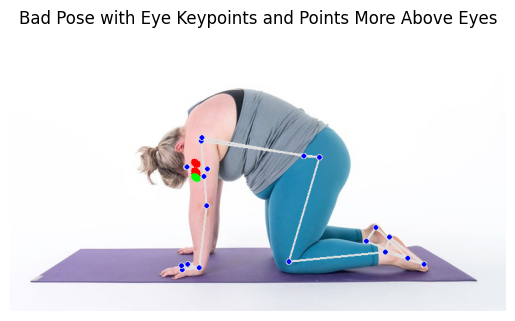

In [14]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp

# Function to extract eye keypoints
def extract_eye_keypoints(results):
    eye_keypoints = []
    eye_landmark_indices = [1, 2, 3, 4, 5, 6]  # Indices related to the eyes
    for i in eye_landmark_indices:
        landmark = results.pose_landmarks.landmark[i]
        eye_keypoints.append([landmark.x, landmark.y, landmark.z])
    return eye_keypoints

# Function to get points more above the eyes
def get_points_above_eyes(eye_keypoints, offset=0.02):
    points_above_eyes = []
    for eye in eye_keypoints:
        x, y, z = eye
        points_above_eyes.append([x, y - offset, z])  # Moving the point more upwards
    return points_above_eyes

# Extract eye keypoints from the bad pose
bad_pose_eye_keypoints = extract_eye_keypoints(result_bad)

# Get points more above the bad pose eye keypoints
points_above_bad_pose_eyes = get_points_above_eyes(bad_pose_eye_keypoints, offset=0.05)

# Draw the original eye keypoints on the image
for (x, y, z) in bad_pose_eye_keypoints:
    h, w, _ = bad_pose_rgb.shape
    cx, cy = int(x * w), int(y * h)
    cv2.circle(bad_pose_rgb, (cx, cy), 5, (0, 255, 0), -1)  # Green circle for original eyes

# Draw the points more above the eyes on the image
for (x, y, z) in points_above_bad_pose_eyes:
    h, w, _ = bad_pose_rgb.shape
    cx, cy = int(x * w), int(y * h)
    cv2.circle(bad_pose_rgb, (cx, cy), 5, (255, 0, 0), -1)  # Blue circle for points more above eyes

# Display the image with the keypoints
plt.imshow(bad_pose_rgb)
plt.title("Bad Pose with Eye Keypoints and Points More Above Eyes")
plt.axis('off')
plt.show()


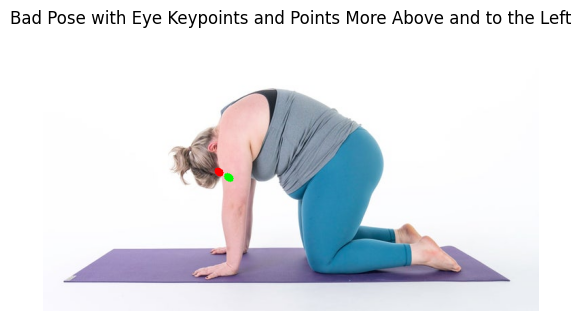

In [15]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp

# Function to extract eye keypoints
def extract_eye_keypoints(results):
    eye_keypoints = []
    eye_landmark_indices = [1, 2, 3, 4, 5, 6]  # Indices related to the eyes
    for i in eye_landmark_indices:
        landmark = results.pose_landmarks.landmark[i]
        eye_keypoints.append([landmark.x, landmark.y, landmark.z])
    return eye_keypoints

# Function to get points more above and to the left of the eyes
def get_points_above_left(eye_keypoints, y_offset=0.02, x_offset=0.02):
    points_above_left = []
    for eye in eye_keypoints:
        x, y, z = eye
        # Moving the point upwards and to the left
        points_above_left.append([x - x_offset, y - y_offset, z])
    return points_above_left

# Extract eye keypoints from the bad pose
bad_pose_eye_keypoints = extract_eye_keypoints(result_bad)

# Get points more above and to the left of the bad pose eye keypoints
points_above_left_bad_pose_eyes = get_points_above_left(bad_pose_eye_keypoints, y_offset=0.02, x_offset=0.02)

# Convert BGR to RGB for displaying with matplotlib
bad_pose_rgb = cv2.cvtColor(bad_pose, cv2.COLOR_BGR2RGB)

# Draw the original eye keypoints on the image
for (x, y, z) in bad_pose_eye_keypoints:
    h, w, _ = bad_pose_rgb.shape
    cx, cy = int(x * w), int(y * h)
    cv2.circle(bad_pose_rgb, (cx, cy), 5, (0, 255, 0), -1)  # Green circle for original eyes

# Draw the points more above and to the left of the eyes on the image
for (x, y, z) in points_above_left_bad_pose_eyes:
    h, w, _ = bad_pose_rgb.shape
    cx, cy = int(x * w), int(y * h)
    cv2.circle(bad_pose_rgb, (cx, cy), 5, (255, 0, 0), -1)  # Blue circle for points above and to the left of eyes

# Display the image with the keypoints
plt.imshow(bad_pose_rgb)
plt.title("Bad Pose with Eye Keypoints and Points More Above and to the Left")
plt.axis('off')
plt.show()


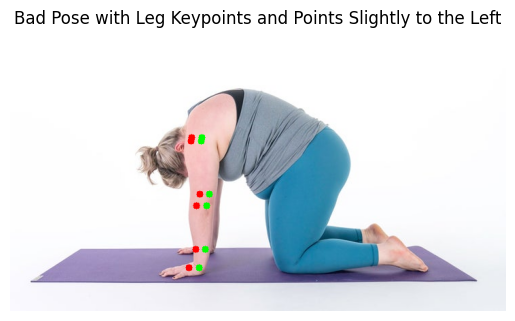

In [16]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp

# Function to extract leg keypoints
def extract_leg_keypoints(results):
    leg_keypoints = []
    leg_landmark_indices = [11, 12, 13, 14, 15, 16]  # Indices related to the legs
    for i in leg_landmark_indices:
        landmark = results.pose_landmarks.landmark[i]
        leg_keypoints.append([landmark.x, landmark.y, landmark.z])
    return leg_keypoints

# Function to get points slightly to the left of the leg keypoints
def get_points_left(leg_keypoints, x_offset=0.02):
    points_left = []
    for leg in leg_keypoints:
        x, y, z = leg
        # Moving the point to the left
        points_left.append([x - x_offset, y, z])
    return points_left

# Extract leg keypoints from the bad pose
bad_pose_leg_keypoints = extract_leg_keypoints(result_bad)

# Get points slightly to the left of the bad pose leg keypoints
points_left_bad_pose_legs = get_points_left(bad_pose_leg_keypoints, x_offset=0.02)

# Convert BGR to RGB for displaying with matplotlib
bad_pose_rgb = cv2.cvtColor(bad_pose, cv2.COLOR_BGR2RGB)

# Draw the original leg keypoints on the image
for (x, y, z) in bad_pose_leg_keypoints:
    h, w, _ = bad_pose_rgb.shape
    cx, cy = int(x * w), int(y * h)
    cv2.circle(bad_pose_rgb, (cx, cy), 5, (0, 255, 0), -1)  # Green circle for original leg points

# Draw the points slightly to the left of the leg keypoints on the image
for (x, y, z) in points_left_bad_pose_legs:
    h, w, _ = bad_pose_rgb.shape
    cx, cy = int(x * w), int(y * h)
    cv2.circle(bad_pose_rgb, (cx, cy), 5, (255, 0, 0), -1)  # Blue circle for points to the left of leg points

# Display the image with the keypoints
plt.imshow(bad_pose_rgb)
plt.title("Bad Pose with Leg Keypoints and Points Slightly to the Left")
plt.axis('off')
plt.show()
